In [40]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [37]:
## Import nba data

nba_data = pd.read_csv('nba_data.csv')

In [2]:
## colors for nba teams

team_colors = {
    'ATL': '#E03A3E',  # Atlanta Hawks
    'BOS': '#007A33',  # Boston Celtics
    'BKN': '#000000',  # Brooklyn Nets
    'CHA': '#1D1160',  # Charlotte Hornets
    'CHI': '#CE1141',  # Chicago Bulls
    'CLE': '#860038',  # Cleveland Cavaliers
    'DAL': '#00538C',  # Dallas Mavericks
    'DEN': '#0E2240',  # Denver Nuggets
    'DET': '#C8102E',  # Detroit Pistons
    'GSW': '#1D428A',  # Golden State Warriors
    'HOU': '#CE1141',  # Houston Rockets
    'IND': '#002D62',  # Indiana Pacers
    'LAC': '#C8102E',  # LA Clippers
    'LAL': '#552583',  # Los Angeles Lakers
    'MEM': '#5D76A9',  # Memphis Grizzlies
    'MIA': '#98002E',  # Miami Heat
    'MIL': '#00471B',  # Milwaukee Bucks
    'MIN': '#0C2340',  # Minnesota Timberwolves
    'NOP': '#0C2340',  # New Orleans Pelicans
    'NYK': '#006BB6',  # New York Knicks
    'OKC': '#007AC1',  # Oklahoma City Thunder
    'ORL': '#0077C0',  # Orlando Magic
    'PHI': '#006BB6',  # Philadelphia 76ers
    'PHX': '#1D1160',  # Phoenix Suns
    'POR': '#E03A3E',  # Portland Trail Blazers
    'SAC': '#5A2D81',  # Sacramento Kings
    'SAS': '#C4CED4',  # San Antonio Spurs
    'TOR': '#CE1141',  # Toronto Raptors
    'UTA': '#002B5C',  # Utah Jazz
    'WAS': '#002B5C'   # Washington Wizards
}

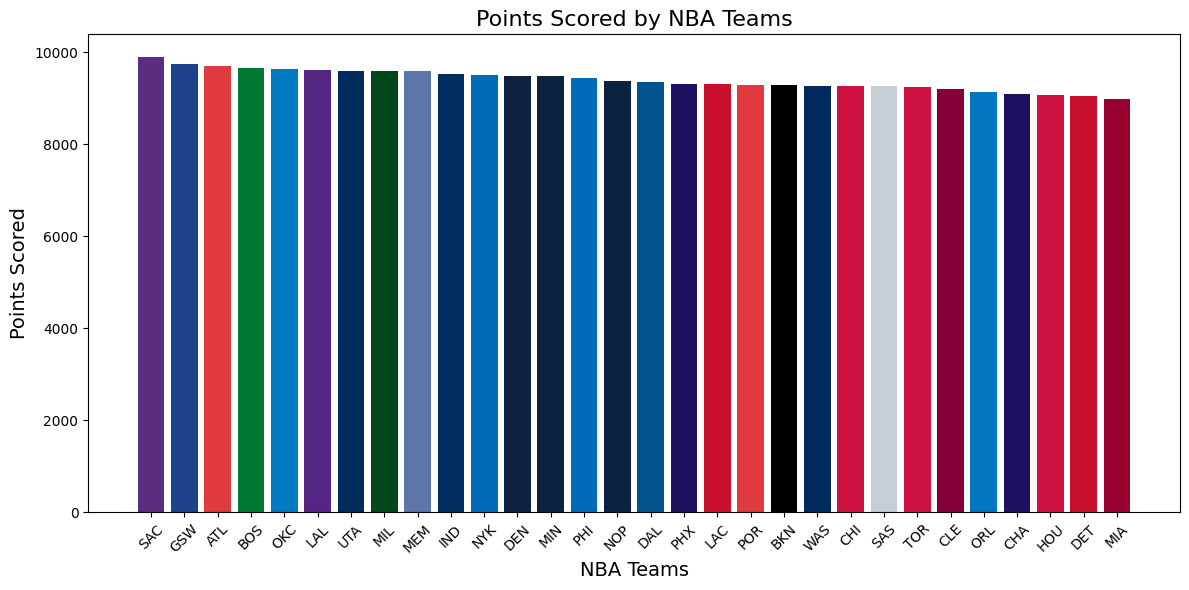

In [16]:
teams = list(sorted_team_scores.keys())
scores = list(sorted_team_scores.values())
colors = [team_colors[team] for team in teams]

# Make figure larger
plt.figure(figsize=(12, 6))

# Create bar chart
plt.bar(teams, scores, color=colors)

# Add labels and title
plt.xlabel('NBA Teams', fontsize=14)
plt.ylabel('Points Scored', fontsize=14)
plt.title('Points Scored by NBA Teams', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

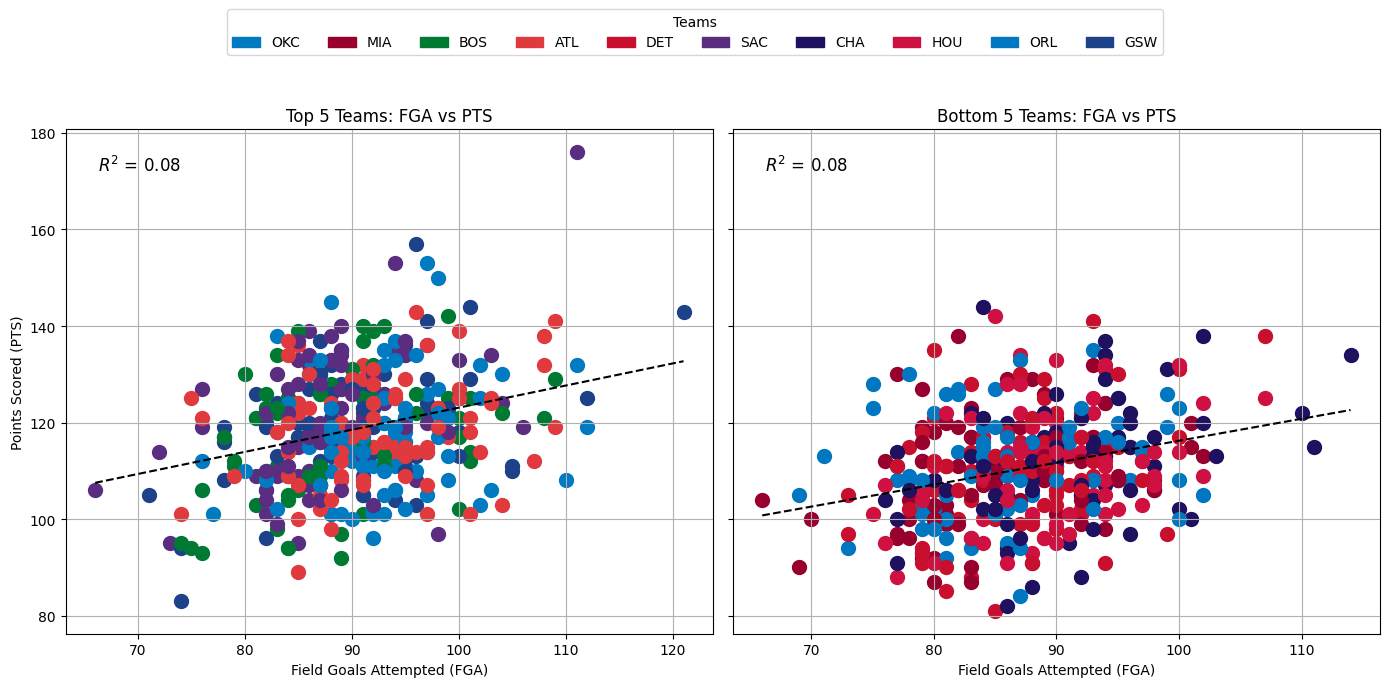

Top 5 R²: 0.0832
Bottom 5 R²: 0.0839


In [15]:
## subsetting data frame for top 5 teams and bottom 5 teams

new_cols = ['SEASON_YEAR','TEAM_ABBREVIATION','PTS','FGA']

NBA_Subset = nba_data.reindex(columns=new_cols)

subset23 = NBA_Subset[NBA_Subset['SEASON_YEAR'] == '2022-23']

team_scores = defaultdict(int)

for i, j in subset23.iterrows():
  ## print(j['TEAM_ABBREVIATION'], j['PTS'])
   team_scores[j['TEAM_ABBREVIATION']] += int(j['PTS'])


sorted_team_scores = dict(sorted(team_scores.items(), key=lambda item: item[1], reverse=True))

Top_5_Scoring = dict(list(sorted_team_scores.items())[:5])
Bottom_5_Scoring = dict(list(sorted_team_scores.items())[-5:])

top_5_df = subset23[subset23['TEAM_ABBREVIATION'].isin(Top_5_Scoring.keys())]
bottom_5_df = subset23[subset23['TEAM_ABBREVIATION'].isin(Bottom_5_Scoring.keys())]

# Combine team abbreviations for legend
all_teams = set(top_5_df['TEAM_ABBREVIATION']).union(bottom_5_df['TEAM_ABBREVIATION'])
legend_handles = [
    Patch(color=team_colors.get(team, '#333333'), label=team)
    for team in all_teams
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

def plot_with_regression(df, ax, title):
    # Scatter points
    for _, row in df.iterrows():
        ax.scatter(row['FGA'], row['PTS'],
                   color=team_colors.get(row['TEAM_ABBREVIATION'], '#333333'),
                   s=100)

    # Regression line
    X = df[['FGA']].values
    y = df['PTS'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Plot line
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = model.predict(x_range)
    ax.plot(x_range, y_line, color='black', linestyle='--')

    # Annotate R²
    ax.text(0.05, 0.95, f"$R^2$ = {r2:.2f}", transform=ax.transAxes,
            verticalalignment='top', fontsize=12)

    ax.set_title(title)
    ax.set_xlabel('Field Goals Attempted (FGA)')
    ax.grid(True)
    return r2

axes[0].set_ylabel('Points Scored (PTS)')
r2_top = plot_with_regression(top_5_df, axes[0], 'Top 5 Teams: FGA vs PTS')
r2_bottom = plot_with_regression(bottom_5_df, axes[1], 'Bottom 5 Teams: FGA vs PTS')

# Add legend
fig.legend(handles=legend_handles, title='Teams', loc='lower center',
           ncol=len(legend_handles), bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()

print(f"Top 5 R²: {r2_top:.4f}")
print(f"Bottom 5 R²: {r2_bottom:.4f}")

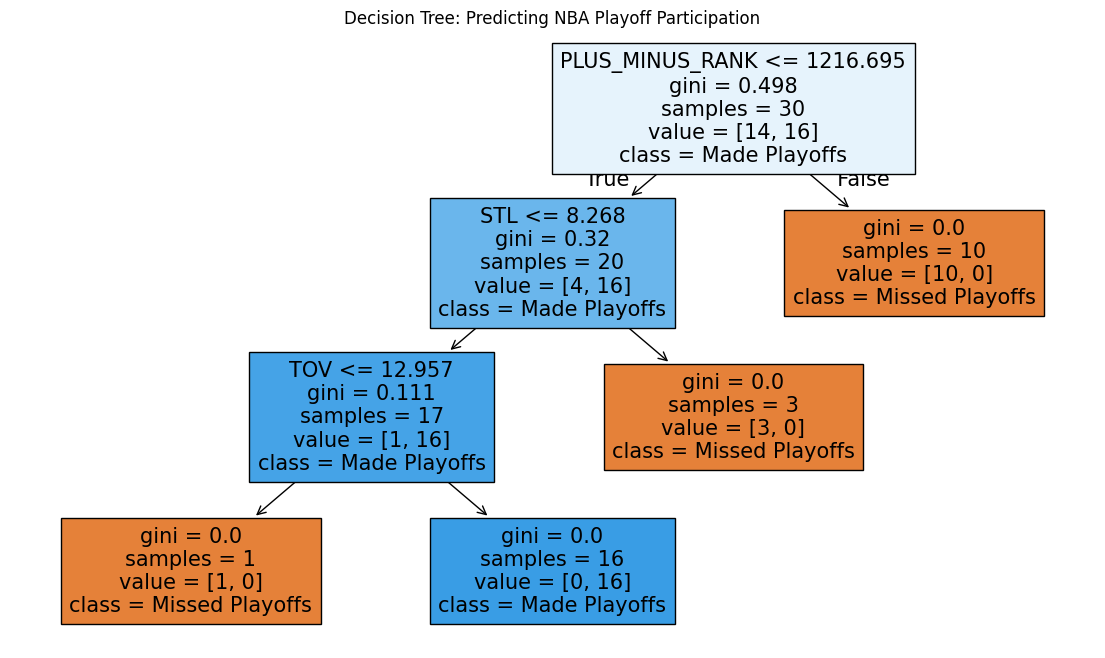

In [35]:
## Decision Tree for NBA Playoffs

nba_2022_23_playoff_numbers = [
    ("Atlanta Hawks", 0),
    ("Boston Celtics", 1),
    ("Brooklyn Nets", 1),
    ("Charlotte Hornets", 0),
    ("Chicago Bulls", 1),
    ("Cleveland Cavaliers", 1),
    ("Dallas Mavericks", 0),
    ("Denver Nuggets", 1),
    ("Detroit Pistons", 0),
    ("Golden State Warriors", 1),
    ("Houston Rockets", 0),
    ("Indiana Pacers", 0),
    ("Los Angeles Clippers", 1),
    ("Los Angeles Lakers", 1),
    ("Memphis Grizzlies", 0),
    ("Miami Heat", 1),
    ("Milwaukee Bucks", 1),
    ("Minnesota Timberwolves", 1),
    ("New Orleans Pelicans", 0),
    ("New York Knicks", 1),
    ("Oklahoma City Thunder", 1),
    ("Orlando Magic", 0),
    ("Philadelphia 76ers", 1),
    ("Phoenix Suns", 1),
    ("Portland Trail Blazers", 0),
    ("Sacramento Kings", 1),
    ("San Antonio Spurs", 0),
    ("Toronto Raptors", 0),
    ("Utah Jazz", 0),
    ("Washington Wizards", 0),
]

nba_23playoff_numbers = []

for i in nba_2022_23_playoff_numbers:
    # print(i[0], nba_data[nba_data['TEAM_NAME'] == i[0]]['TEAM_ABBREVIATION'].to_list()[0])
    team_ab = nba_data[nba_data['TEAM_NAME'] == i[0]]['TEAM_ABBREVIATION'].to_list()[0]
    nba_23playoff_numbers.append((team_ab,i[1]))


stats = ['TEAM_ABBREVIATION','FGA', 'PTS', 'AST', 'REB', 'FG_PCT', 'FG3_PCT', 'FT_PCT','PLUS_MINUS_RANK','TOV','STL','BLK']
full_subset_23 = nba_data[nba_data['SEASON_YEAR'] == '2022-23']
dtdf = full_subset_23.reindex(columns=stats)
dtdf = dtdf.groupby('TEAM_ABBREVIATION',as_index=False).mean()

# 1. Define the stat columns
stats = [
    'FGA', 'PTS', 'AST', 'REB', 'FG_PCT', 'FG3_PCT', 'FT_PCT',
    'PLUS_MINUS_RANK', 'TOV', 'STL', 'BLK'
]

# 2. Select only necessary columns
dtdf = full_subset_23[['TEAM_ABBREVIATION'] + stats]

# 3. Group by team and average all stat columns
dtdf = dtdf.groupby('TEAM_ABBREVIATION', as_index=False).mean()

# 4. Map playoff info to each team
nba_23_playoff_dict = dict(nba_23playoff_numbers)
dtdf['playoff'] = dtdf['TEAM_ABBREVIATION'].map(nba_23_playoff_dict)

# 5. Drop teams with missing playoff labels
dt_df = dtdf.dropna(subset=['playoff'])

# 6. Define features and target
X = dt_df[stats]
y = dt_df['playoff']

# 7. Fit decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# 8. Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Missed Playoffs', 'Made Playoffs'], filled=True)
plt.title("Decision Tree: Predicting NBA Playoff Participation")
plt.show()


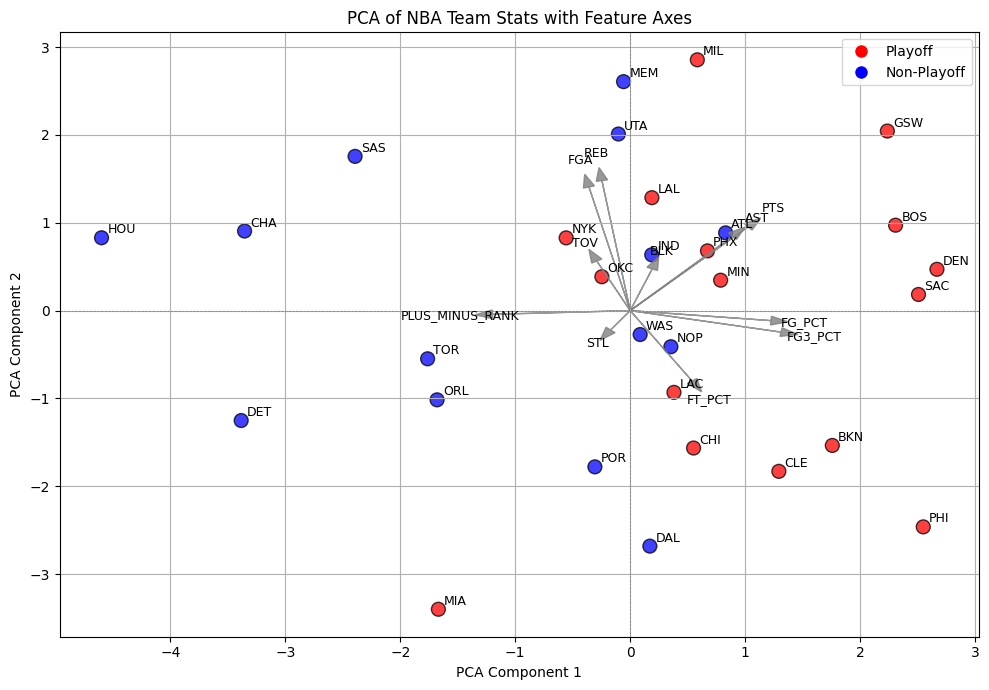

In [31]:
## PCA Playoff Predictor Plot

# 1. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Get team labels
teams = dt_df['TEAM_ABBREVIATION'].values
colors = ['red' if label == 1 else 'blue' for label in y]

# 4. Plot PCA scatter with teams
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=100, edgecolor='k', alpha=0.75)

# Annotate teams
for i, team in enumerate(teams):
    plt.annotate(team, (X_pca[i, 0] + 0.05, X_pca[i, 1] + 0.05), fontsize=9)

# 5. Plot feature vectors (loading vectors)
feature_names = X.columns
loadings = pca.components_.T  # shape: (n_features, n_components)
scaling_factor = 3  # Length multiplier for visualization

for i, feature in enumerate(feature_names):
    plt.arrow(
        0, 0,
        loadings[i, 0] * scaling_factor,
        loadings[i, 1] * scaling_factor,
        color='gray',
        alpha=0.8,
        head_width=0.1,
        length_includes_head=True
    )
    plt.text(
        loadings[i, 0] * scaling_factor * 1.1,
        loadings[i, 1] * scaling_factor * 1.1,
        feature,
        color='black',
        ha='center',
        va='center',
        fontsize=9
    )

# 6. Labels, legend, etc.
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of NBA Team Stats with Feature Axes")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.tight_layout()

# Add legend
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Playoff', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-Playoff', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=legend_handles)

plt.show()

Top contributing variables to PCA variance (PC1 + PC2):
                      PC1       PC2  Total_Contribution
REB             -0.090284  0.542532            0.549992
FGA             -0.131942  0.517439            0.533996
PTS              0.378636  0.351624            0.516725
FG3_PCT          0.486439 -0.090671            0.494817
FG_PCT           0.457877 -0.042577            0.459853
AST              0.333149  0.316765            0.459704
PLUS_MINUS_RANK -0.449460 -0.015943            0.449743
FT_PCT           0.207324 -0.308267            0.371499
TOV             -0.119768  0.232392            0.261439
BLK              0.082539  0.204652            0.220670
STL             -0.087510 -0.112836            0.142793


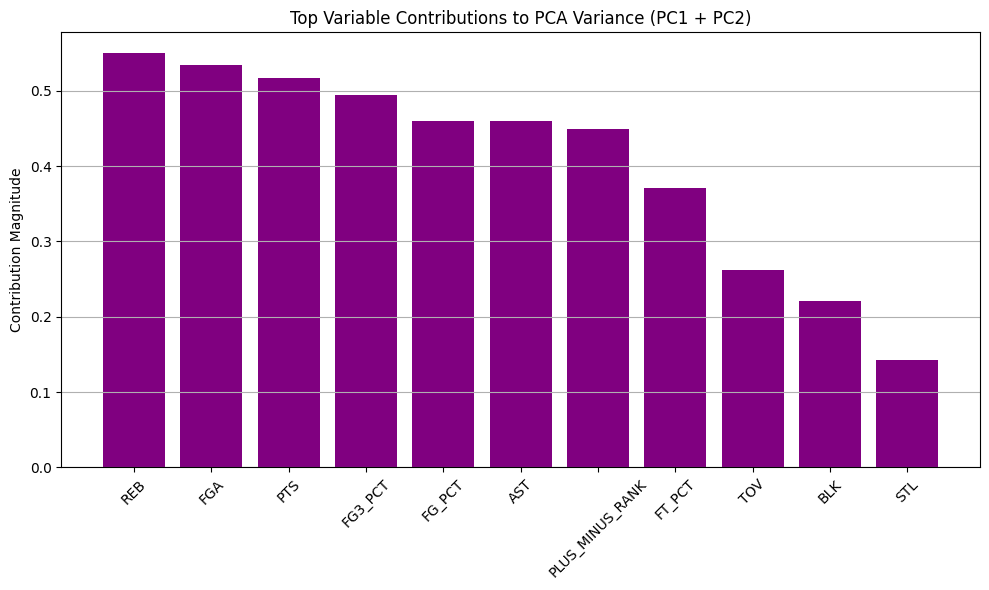

In [32]:
## PCA Bar Chart Stats Incdicator

# 6. Create a DataFrame of PCA loadings (component contributions)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

# 7. Compute magnitude of contribution to total variance
loadings['Total_Contribution'] = np.sqrt(loadings['PC1']**2 + loadings['PC2']**2)

# 8. Sort by contribution magnitude
loadings_sorted = loadings.sort_values(by='Total_Contribution', ascending=False)

# 9. Display the top contributing variables
print("Top contributing variables to PCA variance (PC1 + PC2):")
print(loadings_sorted)

# Optional: Plot top contributors
plt.figure(figsize=(10, 6))
plt.bar(loadings_sorted.index, loadings_sorted['Total_Contribution'], color='purple')
plt.title('Top Variable Contributions to PCA Variance (PC1 + PC2)')
plt.ylabel('Contribution Magnitude')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


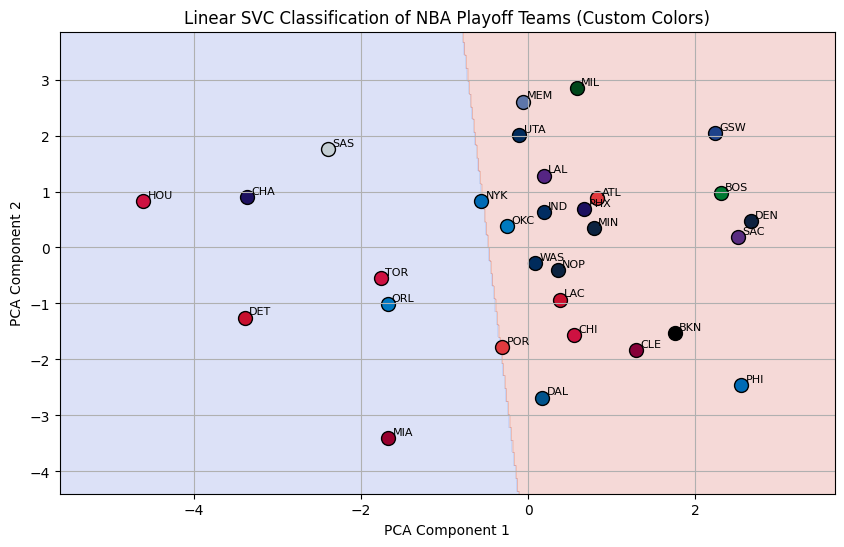

In [33]:
## SVC classification of NBA playoff teams

# 1. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Train Linear SVC
svc = SVC(kernel='linear')
svc.fit(X_pca, y)

# 4. Create mesh grid for background decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Plot each team individually to assign custom color
for i, team in enumerate(dt_df['TEAM_ABBREVIATION']):
    plt.scatter(
        X_pca[i, 0], X_pca[i, 1],
        color=team_colors.get(team, 'gray'),
        edgecolor='k',
        s=100,
        label=team if team not in plt.gca().get_legend_handles_labels()[1] else ""
    )
    plt.annotate(team, (X_pca[i, 0] + 0.05, X_pca[i, 1] + 0.05), fontsize=8)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Linear SVC Classification of NBA Playoff Teams (Custom Colors)")
plt.grid(True)
plt.show()
